In [49]:
import pandas as pd
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer


In [50]:
df = pd.read_csv('database_clean.csv',parse_dates=['publishedAt','extractedAt'])
df.head()

,channelId,videoId,author,publishedAt,comment,extractedAt,tokens_clean_lem,comment_clean_lem
0,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@SEBFRIT,2025-06-02 19:21:45+00:00,Merci à Odoo le sponsor cette vidéo ! Pour déc...,2025-07-01 11:46:10,"['odoo', 'sponsor', 'vidéo', 'découvrir', 'odo...",odoo sponsor vidéo découvrir odoo clique https...
1,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@guishoo4700,2025-06-30 18:45:12+00:00,Fait une vidéo sur Tyler the creator stp,2025-07-01 11:46:10,"['vidéo', 'tyler', 'creator']",vidéo tyler creator
2,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@Remi-B-Goode,2025-06-30 16:35:49+00:00,Lol le disclaimer😂,2025-07-01 11:46:10,['disclaimer'],disclaimer
3,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@Guaph,2025-06-29 20:17:58+00:00,"où peut-on voir la série ""Earn and Alfred"" ???",2025-07-01 11:46:10,"['voir', 'série', 'earn', 'alfred']",voir série earn alfred
4,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@rockman156,2025-06-29 19:05:12+00:00,C'est pas un re upload ? Impression de déjà vu...,2025-07-01 11:46:10,"['upload', 'impression', 'critique', 'foireux'...",upload impression critique foireux impression


# Text blob

In [14]:

# blob1 = tb(u"Quelle belle matinée")
# print(blob1.sentiment)

# blob2 = tb(u"C'est une voiture terribles.")
# print(blob2.sentiment)

# print(blob1.analyzer is blob2.analyzer)


In [51]:
# text raw
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
for i in df['comment'][:10]:
    print(i)
    print(tb(i).sentiment)
    print(tb(i).sentiment[0])  # Affiche la polarité entre -1 et 1
    print(tb(i).sentiment[1])  # Affiche la subjectivité entre 0 et 1
    vs = tb(i).sentiment[0]
    if (vs > 0):
        print('Positive')
    elif (vs < 0):
        print('Negative')
    else:
        print('Neutral')
    print("\n")

Merci à Odoo le sponsor cette vidéo ! Pour découvrir Odoo, clique juste ici : https://www.odoo.com/r/cAlx

Bonne découverte ou redécouverte à tous ! (et allez écouter Childish, c'est important)

bises 🙏
(0.31, 0.25000000000000006)
0.31
0.25000000000000006
Positive


Fait une vidéo sur Tyler the creator stp
(0.0, 0.0)
0.0
0.0
Neutral


Lol le disclaimer😂
(0.0, 0.0)
0.0
0.0
Neutral


où peut-on voir la série "Earn and Alfred" ???
(0.0, 0.0)
0.0
0.0
Neutral


C'est pas un re upload ? Impression de déjà vu (pas une critique foireuse, juste impression de déjà vu de fou)
(0.06999999999999999, 0.6166666666666667)
0.06999999999999999
0.6166666666666667
Positive


fais une vidéo sur tyler the creator stpppppppp
(0.0, 0.0)
0.0
0.0
Neutral


C est pas SEB c est un robot 😅😅😅
(0.0, 0.0)
0.0
0.0
Neutral


Super vidéo comme d’hab, mais je trouve comme souvent que c’est trop individualiste. Il arrive à tout faire aussi en grande partie parce que à chaque fois il est entouré des bonnes personnes qui so

In [16]:
# text clean
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
for i in df['comment_clean_lem'][:10]:
    print(i)
    print(tb(i).sentiment)
    print(tb(i).sentiment[0])  # Affiche la polarité entre -1 et 1
    print(tb(i).sentiment[1])  # Affiche la subjectivité entre 0 et 1
    vs = tb(i).sentiment[0]
    if (vs > 0):
        print('Positive')
    elif (vs < 0):
        print('Negative')
    else:
        print('Neutral')
    print("\n")

['odoo', 'sponsor', 'vidéo', 'découvrir', 'odoo', 'clique', 'httpsw.odoo.comrcal', 'découverte', 'redécouvrir', 'aller', 'écouter', 'childish', 'important', 'bise']
(0.20000000000000004, 0.18333333333333335)
0.20000000000000004
0.18333333333333335
Positive


['vidéo', 'tyler', 'creator']
(0.0, 0.0)
0.0
0.0
Neutral


['disclaimer']
(0.0, 0.0)
0.0
0.0
Neutral


['voir', 'série', 'earn', 'alfred']
(0.0, 0.0)
0.0
0.0
Neutral


['upload', 'impression', 'critique', 'foireux', 'impression']
(0.0, 0.75)
0.0
0.75
Neutral


['vidéo', 'tyler', 'creator', 'stp']
(0.0, 0.0)
0.0
0.0
Neutral


['robot']
(0.0, 0.0)
0.0
0.0
Neutral


['super', 'vidéo', 'trouver', 'trop', 'individualiste', 'arriver', 'faire', 'grand', 'partie', 'fois', 'entourer', 'personne', 'spécialiser', 'domaine']
(0.25, 0.6)
0.25
0.6
Positive


['coiffure', 'rasage', 'déranger', 'monde', 'contre', 'grésillement', 'sortie', 'fois', 'immersion']
(0.0, 0.0)
0.0
0.0
Neutral


['super', 'vidéo', 'vraiment', 'contre', 'faillir', 'taper',

# Emotion English DistilRoBERTa-base

In [52]:
from transformers import pipeline
classifier = pipeline(
    "text-classification", 
    model="j-hartmann/emotion-english-distilroberta-base", 
    return_all_scores=True)

Device set to use mps:0
/Users/carla/Desktop/GitHub/Projet-RNCP/.venv/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [53]:
def get_sentiment(text : str, classifier, all=False ) -> str:
    res = classifier(text)[0]
    max_result = max(res, key=lambda x: x['score'])
    if all == True :
        return f"Label: {max_result['label']}, Score: {round(max_result['score'],2)}"
    else:
        return max_result['label']

for i in df['comment'][:10]:
    print(i)
    print(get_sentiment(i, classifier=classifier))
    print("\n")

Merci à Odoo le sponsor cette vidéo ! Pour découvrir Odoo, clique juste ici : https://www.odoo.com/r/cAlx

Bonne découverte ou redécouverte à tous ! (et allez écouter Childish, c'est important)

bises 🙏
neutral


Fait une vidéo sur Tyler the creator stp
neutral


Lol le disclaimer😂
neutral


où peut-on voir la série "Earn and Alfred" ???
neutral


C'est pas un re upload ? Impression de déjà vu (pas une critique foireuse, juste impression de déjà vu de fou)
disgust


fais une vidéo sur tyler the creator stpppppppp
neutral


C est pas SEB c est un robot 😅😅😅
neutral


Super vidéo comme d’hab, mais je trouve comme souvent que c’est trop individualiste. Il arrive à tout faire aussi en grande partie parce que à chaque fois il est entouré des bonnes personnes qui sont spécialisées dans ces domaines spécifiques 👍
joy


la coiffure et le rasage ne me dérange pas le moins du monde , par contre le grésillement ça ma sortie plusieurs fois de "l'immersion"
disgust


Super vidéo Seb merci vraiment m

In [34]:
for i in df['comment_clean_lem'][:10]:
    print(i)
    print(get_sentiment(i, classifier=classifier))
    print("\n")


['odoo', 'sponsor', 'vidéo', 'découvrir', 'odoo', 'clique', 'httpsw.odoo.comrcal', 'découverte', 'redécouvrir', 'aller', 'écouter', 'childish', 'important', 'bise']
Label: neutral, Score: 0.9


['vidéo', 'tyler', 'creator']
Label: neutral, Score: 0.91


['disclaimer']
Label: neutral, Score: 0.53


['voir', 'série', 'earn', 'alfred']
Label: fear, Score: 0.4


['upload', 'impression', 'critique', 'foireux', 'impression']
Label: neutral, Score: 0.88


['vidéo', 'tyler', 'creator', 'stp']
Label: neutral, Score: 0.91


['robot']
Label: neutral, Score: 0.94


['super', 'vidéo', 'trouver', 'trop', 'individualiste', 'arriver', 'faire', 'grand', 'partie', 'fois', 'entourer', 'personne', 'spécialiser', 'domaine']
Label: neutral, Score: 0.58


['coiffure', 'rasage', 'déranger', 'monde', 'contre', 'grésillement', 'sortie', 'fois', 'immersion']
Label: neutral, Score: 0.79


['super', 'vidéo', 'vraiment', 'contre', 'faillir', 'taper', 'tête', 'contre', 'fois', 'prononcer', 'childish']
Label: neutral

# distilbert-base-multilingual-cased-sentiments-student

In [18]:
distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student", 
    return_all_scores=True, 
)

Device set to use mps:0


In [35]:
for i in df['comment'][:10]:
    print(i)
    print(get_sentiment(i, classifier=distilled_student_sentiment_classifier))
    print("\n")


Merci à Odoo le sponsor cette vidéo ! Pour découvrir Odoo, clique juste ici : https://www.odoo.com/r/cAlx

Bonne découverte ou redécouverte à tous ! (et allez écouter Childish, c'est important)

bises 🙏
Label: positive, Score: 0.94


Fait une vidéo sur Tyler the creator stp
Label: negative, Score: 0.41


Lol le disclaimer😂
Label: positive, Score: 0.41


où peut-on voir la série "Earn and Alfred" ???
Label: negative, Score: 0.39


C'est pas un re upload ? Impression de déjà vu (pas une critique foireuse, juste impression de déjà vu de fou)
Label: negative, Score: 0.49


fais une vidéo sur tyler the creator stpppppppp
Label: positive, Score: 0.43


C est pas SEB c est un robot 😅😅😅
Label: neutral, Score: 0.44


Super vidéo comme d’hab, mais je trouve comme souvent que c’est trop individualiste. Il arrive à tout faire aussi en grande partie parce que à chaque fois il est entouré des bonnes personnes qui sont spécialisées dans ces domaines spécifiques 👍
Label: positive, Score: 0.6


la coif

In [36]:
for i in df['comment_clean_lem'][:10]:
    print(i)
    print(get_sentiment(i, classifier=distilled_student_sentiment_classifier))
    print("\n")


['odoo', 'sponsor', 'vidéo', 'découvrir', 'odoo', 'clique', 'httpsw.odoo.comrcal', 'découverte', 'redécouvrir', 'aller', 'écouter', 'childish', 'important', 'bise']
Label: negative, Score: 0.82


['vidéo', 'tyler', 'creator']
Label: negative, Score: 0.45


['disclaimer']
Label: positive, Score: 0.54


['voir', 'série', 'earn', 'alfred']
Label: positive, Score: 0.69


['upload', 'impression', 'critique', 'foireux', 'impression']
Label: negative, Score: 0.58


['vidéo', 'tyler', 'creator', 'stp']
Label: negative, Score: 0.45


['robot']
Label: positive, Score: 0.5


['super', 'vidéo', 'trouver', 'trop', 'individualiste', 'arriver', 'faire', 'grand', 'partie', 'fois', 'entourer', 'personne', 'spécialiser', 'domaine']
Label: positive, Score: 0.91


['coiffure', 'rasage', 'déranger', 'monde', 'contre', 'grésillement', 'sortie', 'fois', 'immersion']
Label: negative, Score: 0.9


['super', 'vidéo', 'vraiment', 'contre', 'faillir', 'taper', 'tête', 'contre', 'fois', 'prononcer', 'childish']
La

In [43]:
def get_polarity(text, classifier):
    vs = classifier(text).sentiment[0]
    if (vs > 0):
        return('Positive')
    elif (vs < 0):
        return('Negative')
    else:
        return('Neutral')

In [54]:
df["sentiment_label"] = df["comment"].astype(str).apply(
    lambda x: get_polarity(x, tb) # Polarité
)
df.head()

,channelId,videoId,author,publishedAt,comment,extractedAt,tokens_clean_lem,comment_clean_lem,sentiment_label
0,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@SEBFRIT,2025-06-02 19:21:45+00:00,Merci à Odoo le sponsor cette vidéo ! Pour déc...,2025-07-01 11:46:10,"['odoo', 'sponsor', 'vidéo', 'découvrir', 'odo...",odoo sponsor vidéo découvrir odoo clique https...,Positive
1,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@guishoo4700,2025-06-30 18:45:12+00:00,Fait une vidéo sur Tyler the creator stp,2025-07-01 11:46:10,"['vidéo', 'tyler', 'creator']",vidéo tyler creator,Neutral
2,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@Remi-B-Goode,2025-06-30 16:35:49+00:00,Lol le disclaimer😂,2025-07-01 11:46:10,['disclaimer'],disclaimer,Neutral
3,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@Guaph,2025-06-29 20:17:58+00:00,"où peut-on voir la série ""Earn and Alfred"" ???",2025-07-01 11:46:10,"['voir', 'série', 'earn', 'alfred']",voir série earn alfred,Neutral
4,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@rockman156,2025-06-29 19:05:12+00:00,C'est pas un re upload ? Impression de déjà vu...,2025-07-01 11:46:10,"['upload', 'impression', 'critique', 'foireux'...",upload impression critique foireux impression,Positive


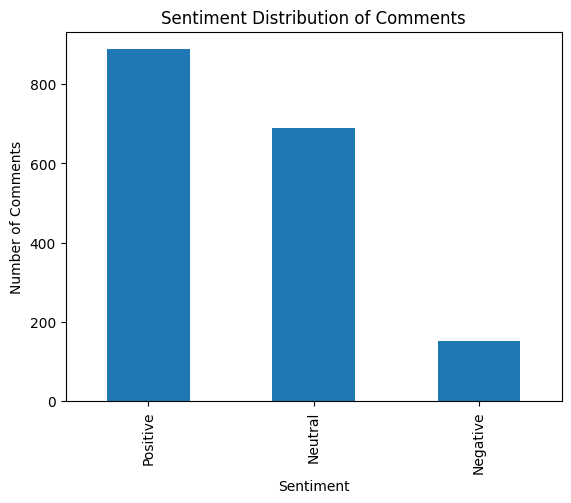

In [47]:
# distribution des commentaires en fonction des sentiments
df["sentiment_label"].value_counts().plot(kind='bar', title='Sentiment Distribution')
import matplotlib.pyplot as plt
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title('Sentiment Distribution of Comments')
plt.show()

# Ecriture du fichier

In [55]:
df.to_csv('database_sentiment_label.csv', index=False)